In [1]:
import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [3]:
filename = "training.csv"
df = pd.read_csv(filename, index_col=False )

In [4]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [5]:
df=df.drop(['EventId'],axis=1)

In [6]:
Label_mapping = {
    's'  : 0,
    'b' : 1
}

df['Label'] = df['Label'].map(Label_mapping)

In [7]:
feat = ['DER_mass_MMC', 'DER_mass_transverse_met_lep','DER_mass_vis', 'DER_pt_h','DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 
                     'DER_prodeta_jet_jet',  'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
                'PRI_tau_pt','PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi',
              'PRI_met','PRI_met_phi','PRI_met_sumet','PRI_jet_num',
              'PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt','Weight']

In [8]:
train = df.iloc[:174999]
test = df.iloc[174999:]

In [9]:
Target = 'Label'

In [14]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:
df.fillna(-999, inplace=True)

In [16]:
def run_model(clf):
  """
  Function to fit the classifier, generate predictions and calculate f1_score.
  params: clf - The classifier which needs to be implemented
  """

  # Define Model
  clf = clf

  # Fit Model
  clf.fit(X_trn, y_trn)

  # Obtain Predictions
  preds_val = clf.predict(X_val)

  # Evaluate Model
  metric = f1_score(y_val, preds_val)
  print(f"f1 score: {metric}")
  # get importance
  importance = clf.feature_importances_
# summarize feature importance
  for i,v in enumerate(importance):
   print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()

In [17]:
# Split train and validation data
trn, val = train_test_split(train, test_size=0.2, random_state = 1, stratify = train[Target])

# Input to our model will be the features
X_trn, X_val = trn[feat], val[feat]

# Output of our model will be the TARGET_COL
y_trn, y_val = trn[Target], val[Target]

# Features for the test data that we will be predicting
X_test = test[feat]

In [18]:
from sklearn.ensemble import RandomForestClassifier

f1 score: 1.0
Feature: 0, Score: 0.06654
Feature: 1, Score: 0.03888
Feature: 2, Score: 0.02158
Feature: 3, Score: 0.00445
Feature: 4, Score: 0.00761
Feature: 5, Score: 0.00871
Feature: 6, Score: 0.00130
Feature: 7, Score: 0.00614
Feature: 8, Score: 0.00235
Feature: 9, Score: 0.00350
Feature: 10, Score: 0.01106
Feature: 11, Score: 0.01513
Feature: 12, Score: 0.02020
Feature: 13, Score: 0.00117
Feature: 14, Score: 0.00096
Feature: 15, Score: 0.00208
Feature: 16, Score: 0.00141
Feature: 17, Score: 0.00100
Feature: 18, Score: 0.00456
Feature: 19, Score: 0.00102
Feature: 20, Score: 0.00181
Feature: 21, Score: 0.00117
Feature: 22, Score: 0.00070
Feature: 23, Score: 0.00059
Feature: 24, Score: 0.00068
Feature: 25, Score: 0.00227
Feature: 26, Score: 0.77314


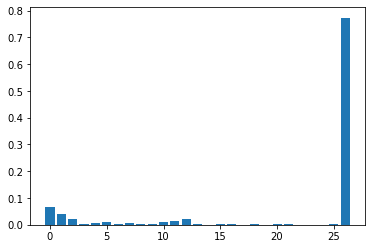

In [19]:
run_model(RandomForestClassifier(n_estimators = 100))